# project: spam classfier using NLP

over view

This project aims to build a machine learning model to classify SMS messages as "spam" or "not spam" based on their content. It utilizes NLP techniques for text processing and a logistic regression model for classification.
Tools and Libraries Required

   . Python 3.x
   . Pandas (for data manipulation)
   . NLTK (for text preprocessing)
   . Scikit-learn (for model building, training, and evaluation)
   . Matplotlib (for visualization)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('C:/Users/ELCOT/Downloads/SPAM text message 20170820 - data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df.isna

<bound method DataFrame.isna of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [7]:
df.duplicated().sum()

415

In [8]:
df.duplicated().value_counts()

False    5157
True      415
Name: count, dtype: int64

In [9]:
df.drop_duplicates()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.duplicated().sum()

415

In [11]:
df.drop_duplicates(inplace=True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5157, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

Category       2
Message     5157
dtype: int64

In [15]:
df.value_counts()

Category  Message                                                                                                                              
ham       &lt;#&gt;  am I think? Should say on syllabus                                                                                            1
          Thanx u darlin!im cool thanx. A few bday drinks 2 nite. 2morrow off! Take care c u soon.xxx                                              1
          Thanks for loving me so. You rock                                                                                                        1
          Thanks for looking out for me. I really appreciate.                                                                                      1
          Thanks for being there for me just to talk to on saturday. You are very dear to me. I cherish having you as a brother and role model.    1
                                                                                                               

In [16]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

<Axes: ylabel='count'>

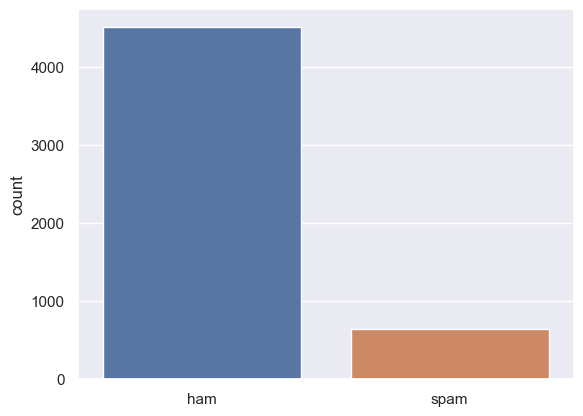

In [17]:
sns.barplot(x=df['Category'].unique(),y=df['Category'].value_counts())

In [18]:
df['Total Words'] = df['Message'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['Total Chars'] = df["Message"].apply(count_total_words)

In [19]:
df.head()

,Category,Message,Total Words,Total Chars
0,ham,"Go until jurong point, crazy.. Available only ...",20,92
1,ham,Ok lar... Joking wif u oni...,6,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128
3,ham,U dun say so early hor... U c already then say...,11,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,49


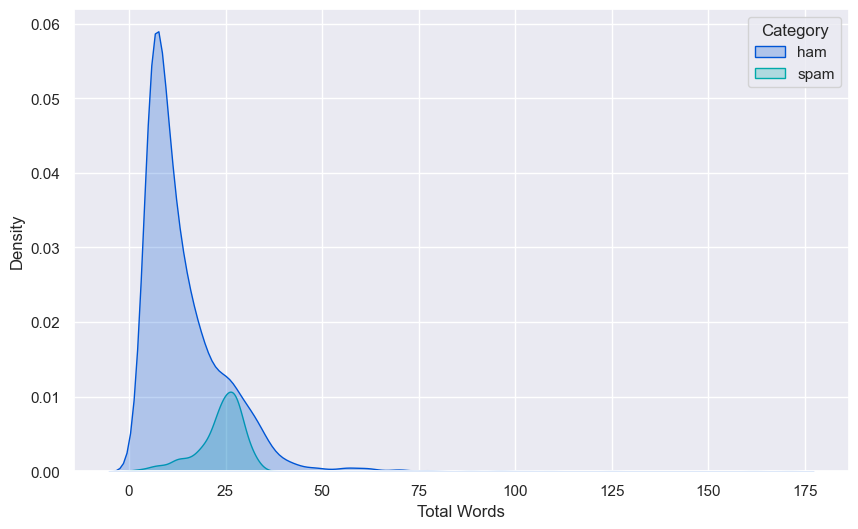

In [20]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['Total Words'], hue= df['Category'], palette= 'winter', shade = True)
plt.show()

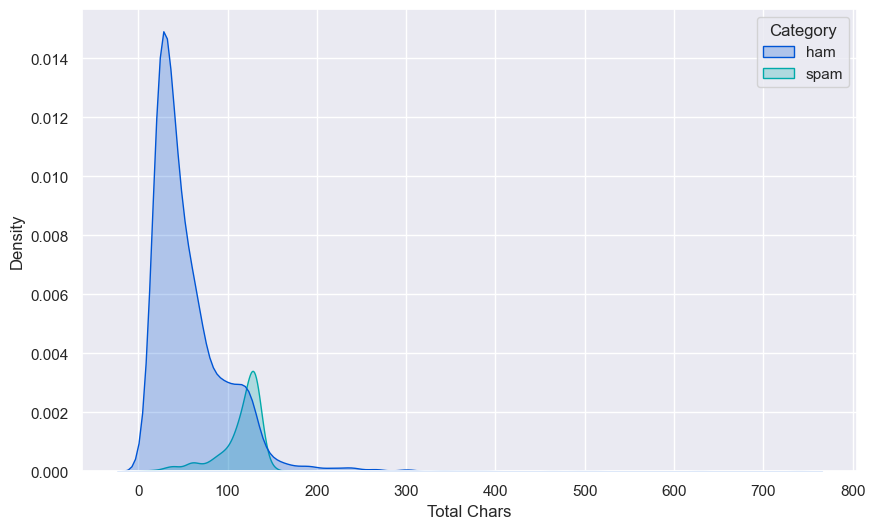

In [21]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['Total Chars'], hue= df['Category'], palette= 'winter', shade = True)
plt.show()

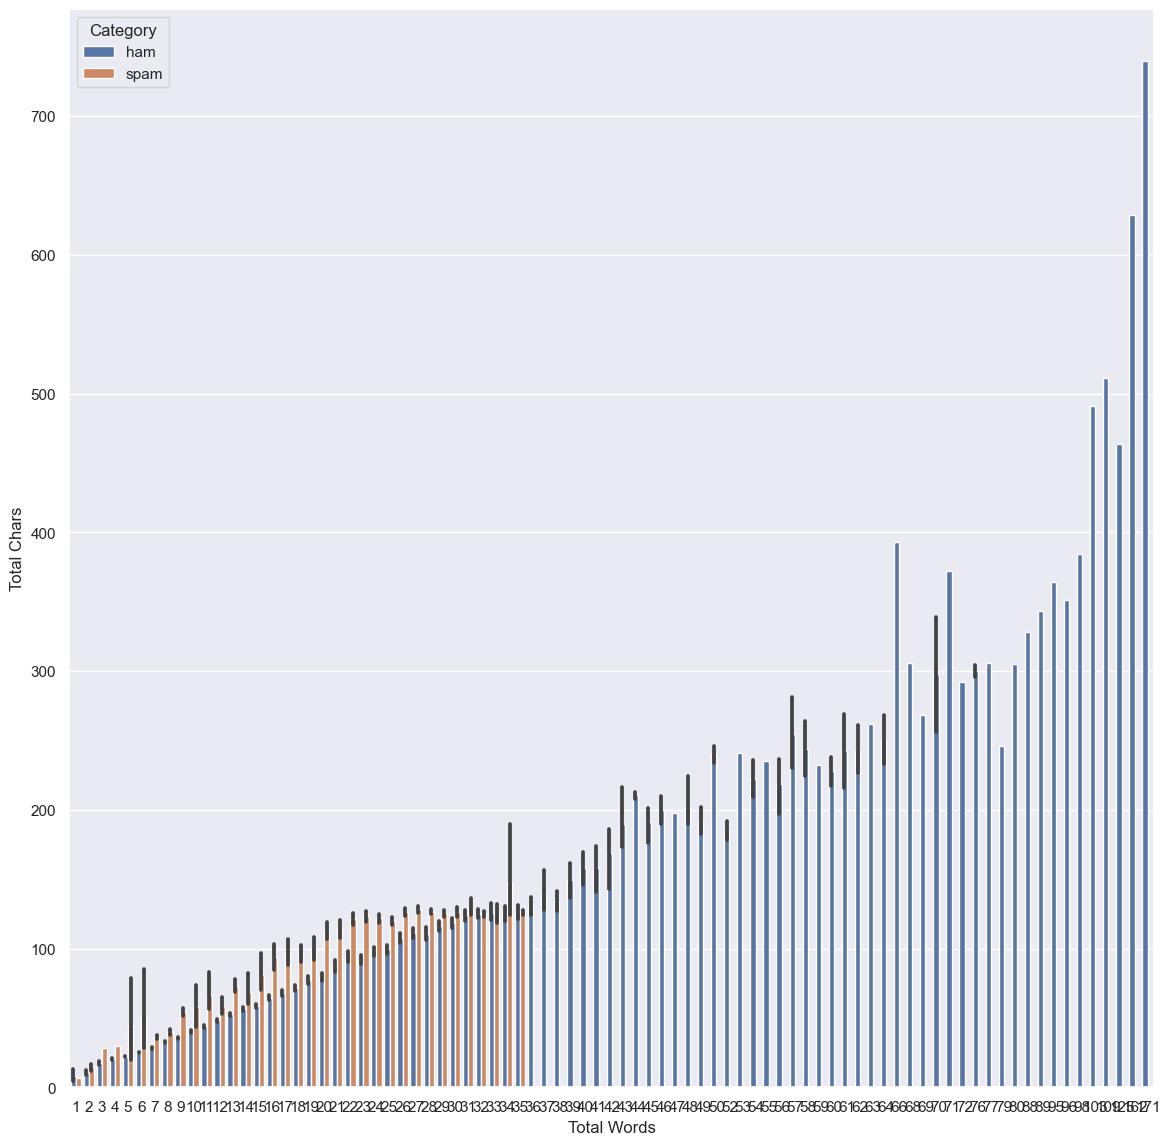

In [22]:
plt.figure(figsize = (14, 14))
sns.barplot(x = df['Total Words'],y = df['Total Chars'], hue= df['Category'])
plt.show()

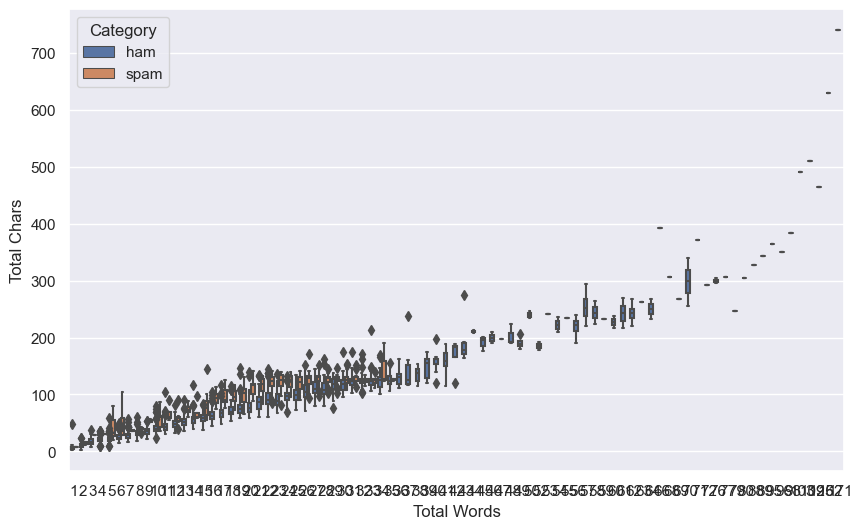

In [23]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['Total Words'],y = df['Total Chars'], hue= df['Category'])
plt.show()

Lower case

In [24]:
def convert_lowercase(text):
    text = text.lower()
    return text

df['Message'] = df['Message'].apply(convert_lowercase)

Removing URLs

In [25]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['Message'] = df['Message'].apply(remove_url)

Removing punctuation

In [26]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['Message'] = df['Message'].apply(remove_punc)

Removing stopwords

In [27]:

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

df['Message'] = df['Message'].apply(remove_stopwords)

Stemming

In [28]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

df['Message'] = df['Message'].apply(perform_stemming)

In [30]:
df['Total Words After Transformation'] = df['Message'].apply(lambda x: np.log(len(x.split())))

In [31]:
df.head()

,Category,Message,Total Words,Total Chars,Total Words After Transformation
0,ham,go jurong point crazi avail bugi n great world...,20,92,2.772589
1,ham,ok lar joke wif u oni,6,24,1.791759
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,28,128,3.135494
3,ham,u dun say earli hor u c alreadi say,11,39,2.197225
4,ham,nah dont think goe usf live around though,13,49,2.079442


In [35]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 1.6 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/300.2 kB 1.0 MB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 952.6 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 915.1 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 915.1 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 774.0 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 764.6 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 640.0 kB/s eta 0:00:0

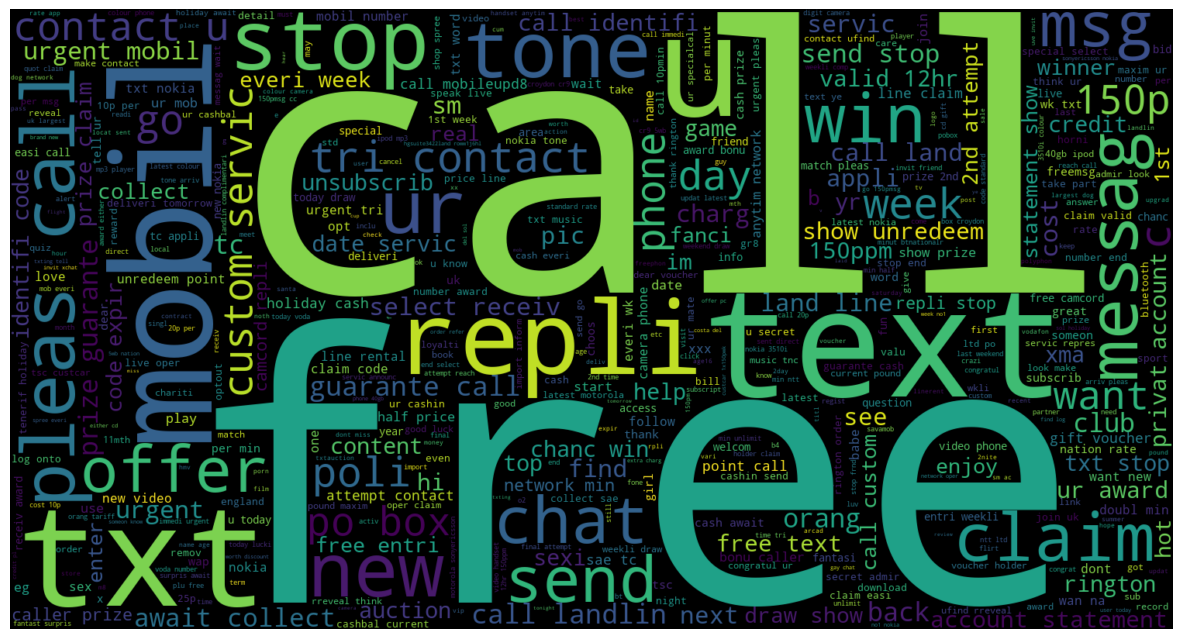

In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df is your DataFrame
text = " ".join(df[df['Category'] == 'spam']['Message'])

# Create a figure
plt.figure(figsize=(15, 10))

# Generate the word cloud
wordcloud = WordCloud(max_words=500, height=800, width=1500, background_color="black", colormap='viridis').generate(text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Hide the axes
plt.show()  # Show the plot


In [37]:
df['Category'] = df['Category'].replace({'spam':0,'ham':1})

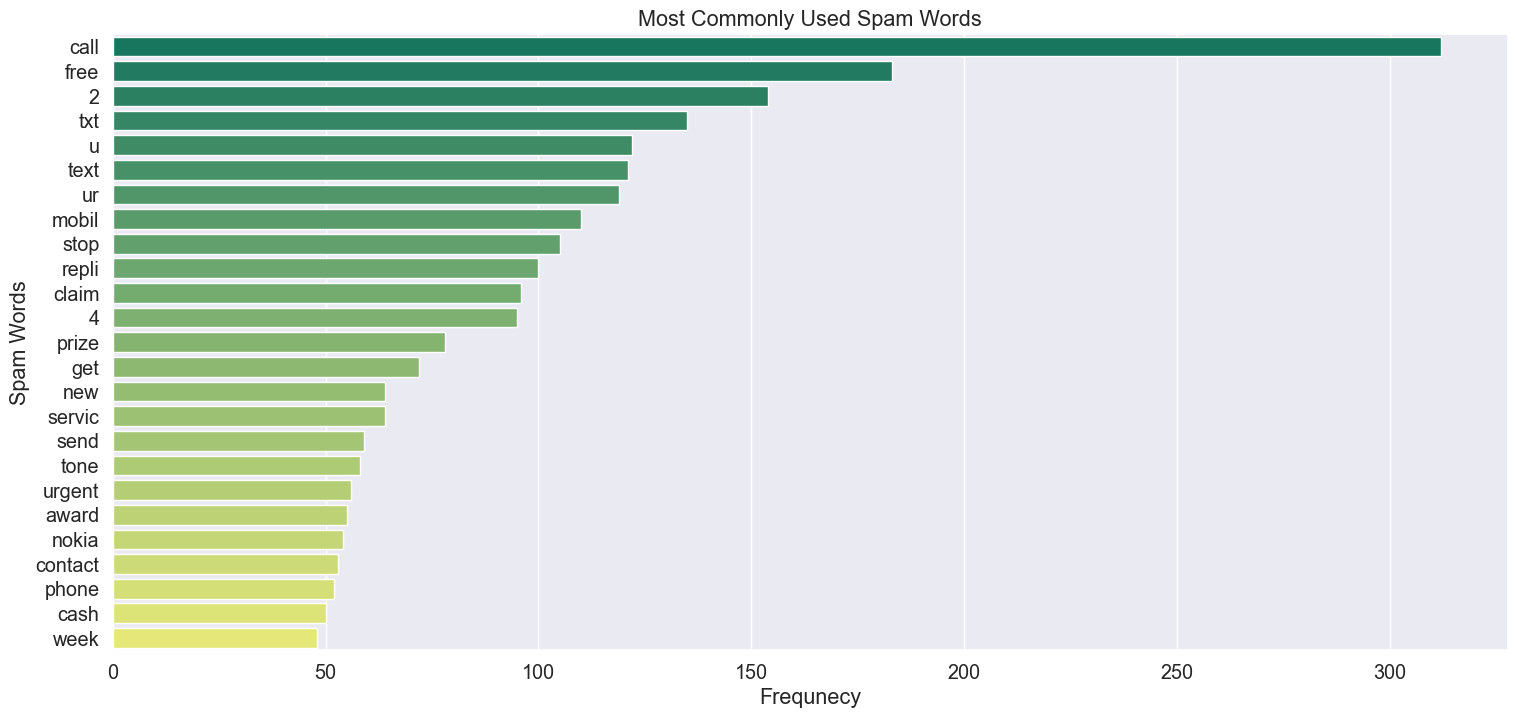

In [39]:
all_spam_words = []
for sentence in df[df['Category'] == 0]['Message'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df_1 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df_1['Word'], x= df_1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

In [40]:
X = df["Message"]
y = df['Category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [41]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [44]:
pip install scikit-learn seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


Accuracy of the model: 0.797
Precision Score of the model: 0.905
Recall Score of the model: 0.677


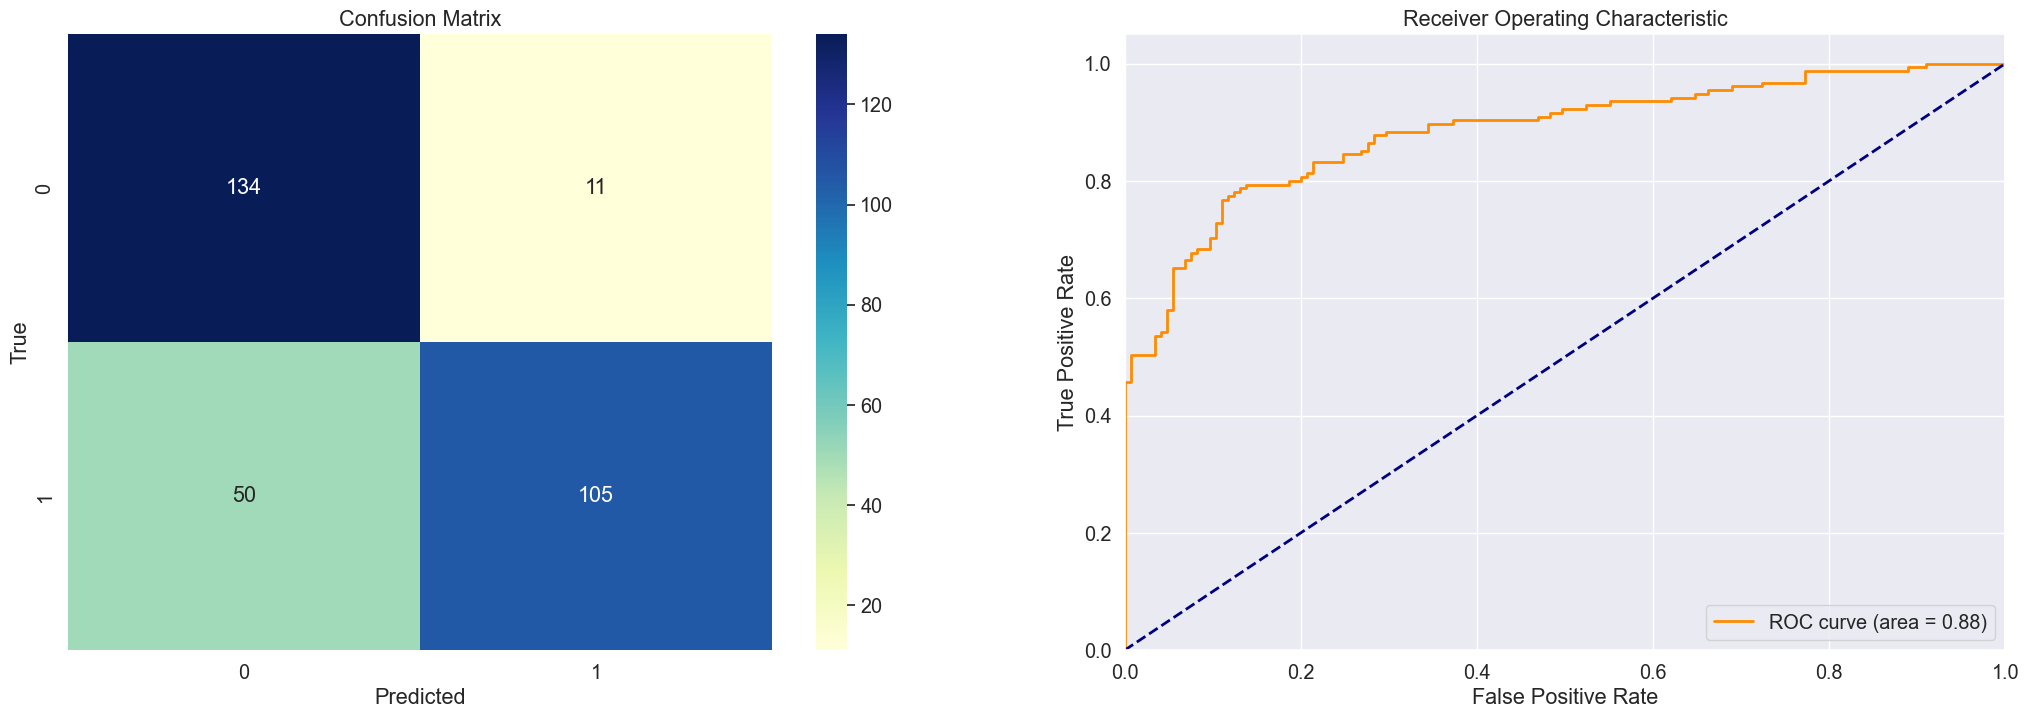

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, ax, cmap='YlGnBu'):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')

# Function to plot the ROC curve
def plot_roc(y_test, y_prob, ax, plot_macro=False, plot_micro=False, cmap='summer'):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc="lower right")
    return ax

# Function to train the model and plot results
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    
    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')


    sns.set_context('notebook', font_scale=1.3)
    fig, ax = plt.subplots(1, 2, figsize=(25, 8))
    plot_confusion_matrix(y_test, y_pred, ax=ax[0], cmap='YlGnBu')
    plot_roc(y_test, y_prob, ax=ax[1], plot_macro=False, plot_micro=False, cmap='summer')
    plt.show()

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Scale the data to be non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the model
nb = MultinomialNB()
train_model(nb)


Accuracy of the model: 0.863
Precision Score of the model: 0.89
Recall Score of the model: 0.839


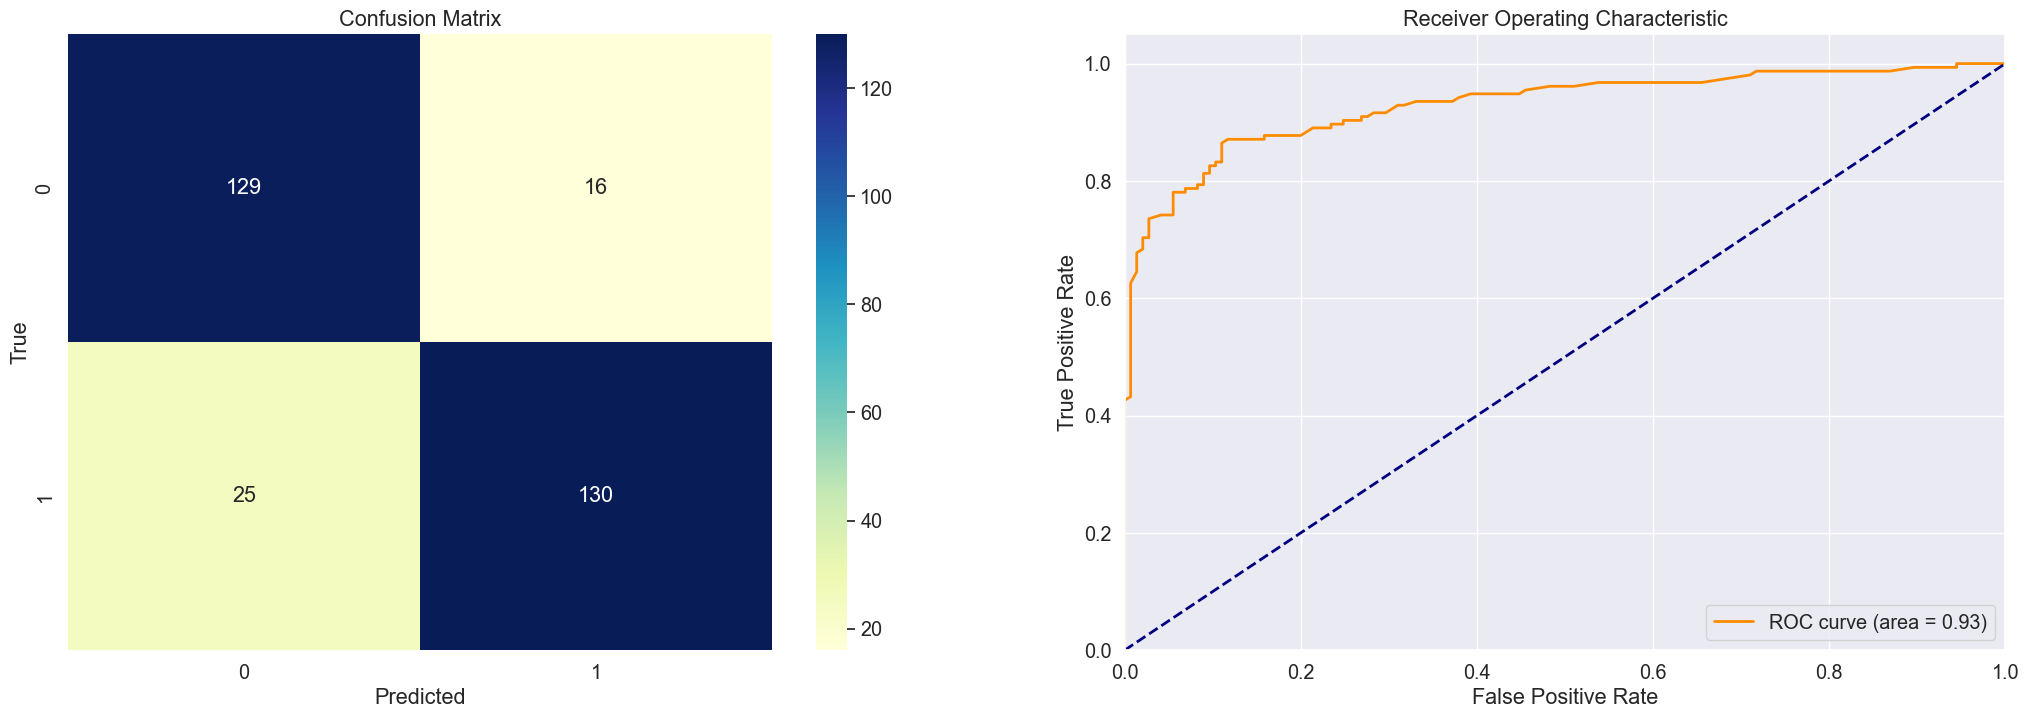

In [54]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)